In [3]:
df=read.csv("Desktop/118B Project/compas-scores-two-years.csv")
head(df)
table(df$race)

id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
1,miguel hernandez,miguel,hernandez,8/14/13,Male,4/18/47,69,Greater than 45,Other,...,1,Low,8/14/13,7/7/14,7/14/14,0,0,327,0,0
3,kevon dixon,kevon,dixon,1/27/13,Male,1/22/82,34,25 - 45,African-American,...,1,Low,1/27/13,1/26/13,2/5/13,0,9,159,1,1
4,ed philo,ed,philo,4/14/13,Male,5/14/91,24,Less than 25,African-American,...,3,Low,4/14/13,6/16/13,6/16/13,4,0,63,0,1
5,marcu brown,marcu,brown,1/13/13,Male,1/21/93,23,Less than 25,African-American,...,6,Medium,1/13/13,,,1,0,1174,0,0
6,bouthy pierrelouis,bouthy,pierrelouis,3/26/13,Male,1/22/73,43,25 - 45,Other,...,1,Low,3/26/13,,,2,0,1102,0,0
7,marsha miles,marsha,miles,11/30/13,Male,8/22/71,44,25 - 45,Other,...,1,Low,11/30/13,11/30/13,12/1/13,0,1,853,0,0



African-American            Asian        Caucasian         Hispanic 
            3696               32             2454              637 
 Native American            Other 
              18              377 

#  cleaning up the data

In [2]:
colnames(df)

[1] "id"                      "name"                   
 [3] "first"                   "last"                   
 [5] "compas_screening_date"   "sex"                    
 [7] "dob"                     "age"                    
 [9] "age_cat"                 "race"                   
[11] "juv_fel_count"           "decile_score"           
[13] "juv_misd_count"          "juv_other_count"        
[15] "priors_count"            "days_b_screening_arrest"
[17] "c_jail_in"               "c_jail_out"             
[19] "c_case_number"           "c_offense_date"         
[21] "c_arrest_date"           "c_days_from_compas"     
[23] "c_charge_degree"         "c_charge_desc"          
[25] "is_recid"                "r_case_number"          
[27] "r_charge_degree"         "r_days_from_arrest"     
[29] "r_offense_date"          "r_charge_desc"          
[31] "r_jail_in"               "r_jail_out"             
[33] "violent_recid"           "is_violent_recid"       
[35] "vr_case_number"          "vr_charge_degree"       
[37] "vr_offense_date"         "vr_charge_desc"         
[39] "type_of_assessment"      "decile_score.1"         
[41] "score_text"              "screening_date"         
[43] "v_type_of_assessment"    "v_decile_score"         
[45] "v_score_text"            "v_screening_date"       
[47] "in_custody"              "out_custody"            
[49] "priors_count.1"          "start"                  
[51] "end"                     "event"                  
[53] "two_year_recid"

In [3]:
head(dplyr::select(df,priors_count,priors_count.1))

priors_count,priors_count.1
0,0
0,0
4,4
1,1
2,2
0,0


same info in each col, keeping the second priors_count

In [4]:
recid=dplyr::select(df,is_recid,two_year_recid)
sum(recid[,1]!=recid[,2])

[1] 220

these two factors are very similar... let's keep 'is_recid' (probably accounts for recidivsim beyond 2 years?)

In [5]:
library(dplyr)
df.filt=dplyr::select(df,sex,age_cat,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,type_of_assessment,decile_score.1,v_type_of_assessment,v_decile_score,is_recid,is_violent_recid)
head(df.filt)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



sex,age_cat,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,type_of_assessment,decile_score.1,v_type_of_assessment,v_decile_score,is_recid,is_violent_recid
Male,Greater than 45,Other,0,0,0,F,Risk of Recidivism,1,Risk of Violence,1,0,0
Male,25 - 45,African-American,0,0,0,F,Risk of Recidivism,3,Risk of Violence,1,1,1
Male,Less than 25,African-American,0,0,4,F,Risk of Recidivism,4,Risk of Violence,3,1,0
Male,Less than 25,African-American,0,1,1,F,Risk of Recidivism,8,Risk of Violence,6,0,0
Male,25 - 45,Other,0,0,2,F,Risk of Recidivism,1,Risk of Violence,1,0,0
Male,25 - 45,Other,0,0,0,M,Risk of Recidivism,1,Risk of Violence,1,0,0


In [6]:
colnames(df.filt)[colnames(df.filt)=="decile_score.1"]="r_score"
colnames(df.filt)[colnames(df.filt)=="v_decile_score"]="v_score"
df.filt=df.filt[,!grepl("assessment",colnames(df.filt))]
head(df.filt)

sex,age_cat,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,r_score,v_score,is_recid,is_violent_recid
Male,Greater than 45,Other,0,0,0,F,1,1,0,0
Male,25 - 45,African-American,0,0,0,F,3,1,1,1
Male,Less than 25,African-American,0,0,4,F,4,3,1,0
Male,Less than 25,African-American,0,1,1,F,8,6,0,0
Male,25 - 45,Other,0,0,2,F,1,1,0,0
Male,25 - 45,Other,0,0,0,M,1,1,0,0


### relevelling factors

In [7]:
levels(df.filt$sex)
df.filt$sex=relevel(df.filt$sex,"Male")
levels(df.filt$age_cat)
df.filt$age_cat=relevel(df.filt$age_cat,"Less than 25")
levels(df.filt$race)
df.filt$race=relevel(df.filt$race,"Caucasian")
levels(df.filt$c_charge_degree)
df.filt$c_charge_degree=relevel(df.filt$c_charge_degree,"M")

[1] "Female" "Male"

[1] "25 - 45"         "Greater than 45" "Less than 25"

[1] "African-American" "Asian"            "Caucasian"        "Hispanic"        
[5] "Native American"  "Other"

[1] "F" "M"

# KNN

In [18]:
# changing character factors to numeric

df.num=df.filt
df.num$sex=as.numeric(df.num$sex)-1
df.num$age_cat=as.numeric(df.num$age_cat)-1
df.num$c_charge_degree=as.numeric(df.num$c_charge_degree)-1
head(df.num)

sex,age_cat,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,r_score,v_score,is_recid,is_violent_recid
0,2,Other,0,0,0,1,1,1,0,0
0,1,African-American,0,0,0,1,3,1,1,1
0,0,African-American,0,0,4,1,4,3,1,0
0,0,African-American,0,1,1,1,8,6,0,0
0,1,Other,0,0,2,1,1,1,0,0
0,1,Other,0,0,0,0,1,1,0,0


calculating distance between each person based on factors other than race & score

In [19]:
df.temp=df.num[,!grepl("race|score",colnames(df.num))] # remove race and score for prediction
df.dist=as.matrix(dist(df.temp)) # calc euclidean distance between inmates
diag(df.dist)=666
head(df.dist)

1,2,3,4,5,6,7,8,9,10,...,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214
666.000000,1.732051,4.582576,2.449490,2.236068,1.414214,14.07125,3.162278,1.732051,2.645751,...,2.449490,6.000000,2.449490,1.732051,2.000000,2.000000,2.000000,0.000000,3.464102,3.162278
1.732051,666.000000,4.242641,2.236068,2.449490,1.732051,14.03567,3.316625,2.000000,1.414214,...,2.645751,5.567764,1.732051,1.414214,1.732051,1.732051,1.732051,1.732051,3.605551,2.645751
4.582576,4.242641,666.000000,3.316625,2.449490,4.358899,10.04988,1.732051,4.472136,3.162278,...,2.645751,2.645751,4.123106,4.242641,4.123106,4.123106,4.123106,4.582576,2.236068,2.236068
2.449490,2.236068,3.316625,666.000000,1.732051,2.000000,13.11488,2.449490,2.236068,1.732051,...,2.000000,4.472136,2.000000,2.236068,1.414214,1.414214,1.414214,2.449490,2.828427,2.000000
2.236068,2.449490,2.449490,1.732051,666.000000,2.236068,12.04159,1.000000,2.449490,2.000000,...,1.000000,4.123106,2.645751,2.449490,2.236068,2.236068,2.236068,2.236068,1.732051,1.732051
1.414214,1.732051,4.358899,2.000000,2.236068,666.000000,14.07125,3.162278,1.000000,2.236068,...,2.000000,5.656854,1.414214,1.000000,1.414214,1.414214,1.414214,1.414214,3.162278,2.828427


predicting risk scores based on neighbors

In [45]:
for(k in 20){ # 5:20 ?
    
    i=1
    current=data.frame(dist=df.dist[,i])
    current$idx=seq(1:dim(current)[1])
    current=current %>% arrange(dist)
    neighbors=current$idx[1:k]

    current.race=df.num$race[i] # race of person being predicted
    actual.vscore=df.num$v_score[i] # violence score of person being predicted
    actual.rscore=df.num$r_score[i] # recidivism score of person being predicted
    predict.vscore=mean(df.num$v_score[neighbors]) # predicted violence score based on k neighbors
    predict.rscore=mean(df.num$r_score[neighbors]) # predicted recidivism score based on k neighbors
    vscore.err=actual.vscore-predict.vscore # difference between actual and predicted violence score
    rscore.err=actual.rscore-predict.rscore # difference between actual and predicted recidivism score
    results=data.frame(race=current.race,v.error=vscore.err,r.error=rscore.err) 

    for(i in 2:ncol(df.dist)){
    
        current=data.frame(dist=df.dist[,i])
        current$idx=seq(1:dim(current)[1])
        current=current %>% arrange(dist)
        neighbors=current$idx[1:k]

        current.race=df.num$race[i] # race of person being predicted
        actual.vscore=df.num$v_score[i] # violence score of person being predicted
        actual.rscore=df.num$r_score[i] # recidivism score of person being predicted
        predict.vscore=mean(df.num$v_score[neighbors]) # predicted violence score based on k neighbors
        predict.rscore=mean(df.num$r_score[neighbors]) # predicted recidivism score based on k neighbors
        vscore.err=actual.vscore-predict.vscore # difference between actual and predicted violence score
        rscore.err=actual.rscore-predict.rscore # difference between actual and predicted recidivism score
        results.temp=data.frame(race=current.race,v.error=vscore.err,r.error=rscore.err) 
        results=rbind(results,results.temp)
    
    } # end i people

    write.csv(results,paste0("118b_knn.results_k",k,".csv"))

    cat("k = ",k,"\n")
    aa.violence=results$v.error[results$race=="African-American"]
    cauc.violence=results$v.error[results$race=="Caucasian"]
    cat("african american violence error: ",mean(aa.violence),"\n")
    cat("caucasian violence error: ",mean(cauc.violence),"\n")

    aa.recid=results$r.error[results$race=="African-American"]
    cauc.recid=results$r.error[results$race=="Caucasian"]
    cat("african american recid error: ",mean(aa.recid),"\n")
    cat("caucasian recid error: ",mean(cauc.recid))
    
    # calculate significance of the difference between actual vs. predicted score (i.e. permtation test)
    
    nresamples=1000

    results$race.shuff=sample(results$race,length(results$race),FALSE) # shuffle race ids
    null.dist.aa=data.frame(violence=mean(results$v.error[results$race.shuff=="African-American"]),recid=mean(results$r.error[results$race.shuff=="African-American"]))
    null.dist.cauc=data.frame(violence=mean(results$v.error[results$race.shuff=="Caucasian"]),recid=mean(results$r.error[results$race.shuff=="Caucasian"])) 
    
    for(p in 2:nresamples) {

        results$race.shuff=sample(results$race,length(results$race),FALSE)
        null.dist.aa.temp=data.frame(violence=mean(results$v.error[results$race.shuff=="African-American"]),recid=mean(results$r.error[results$race.shuff=="African-American"]))
        null.dist.cauc.temp=data.frame(violence=mean(results$v.error[results$race.shuff=="Caucasian"]),recid=mean(results$r.error[results$race.shuff=="Caucasian"])) 
    
        null.dist.aa=rbind(null.dist.aa,null.dist.aa.temp)
        null.dist.cauc=rbind(null.dist.cauc,null.dist.cauc.temp)

    } # end p resamples

    write.csv(null.dist.aa,paste0("118b_knn.permutation.aa_k",k,".csv"))
    write.csv(null.dist.cauc,paste0("118b_knn.permutation.cauc_k",k,".csv"))
    
} # // end k neighbors


k =  20 
african american violence error:  0.3103626 
caucasian violence error:  -0.2175835 
african american recid error:  0.3547619 
caucasian recid error:  -0.1964955

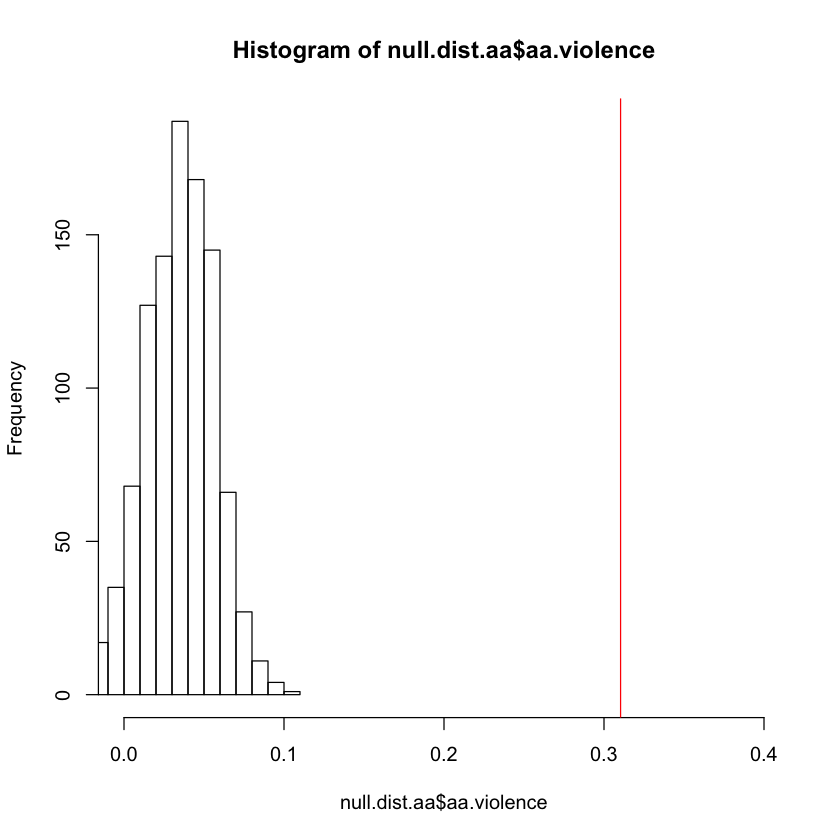

In [30]:
hist(null.dist.aa$violence,xlim=c(0,.4))
abline(v=mean(aa.violence),col="red")

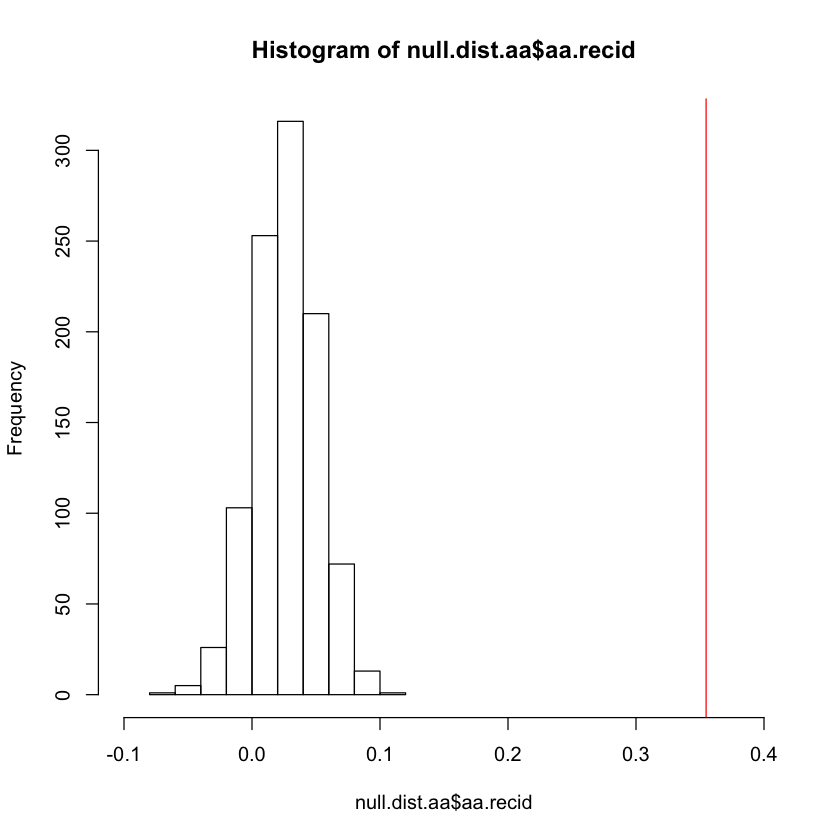

In [55]:
hist(null.dist.aa$recid,xlim=c(-.1,.4))
abline(v=mean(aa.recid) ,col="red")

## difference in actual vs. predictions for african american risk scores is significant (p<0.01)

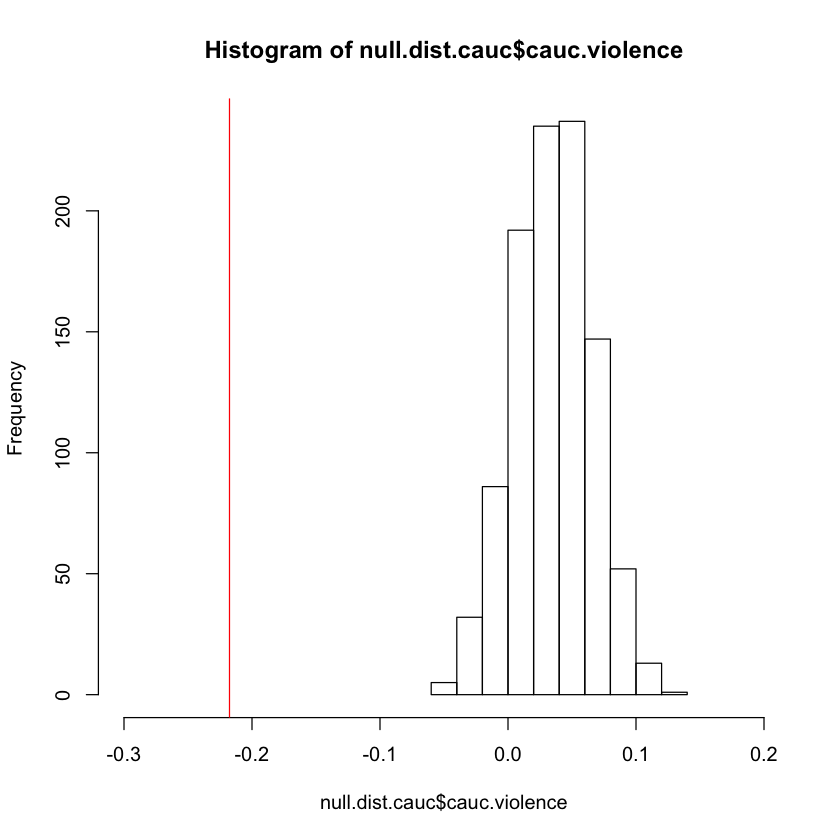

In [52]:
hist(null.dist.cauc$violence,xlim=c(-.3,.2))
abline(v=mean(cauc.violence),col="red")

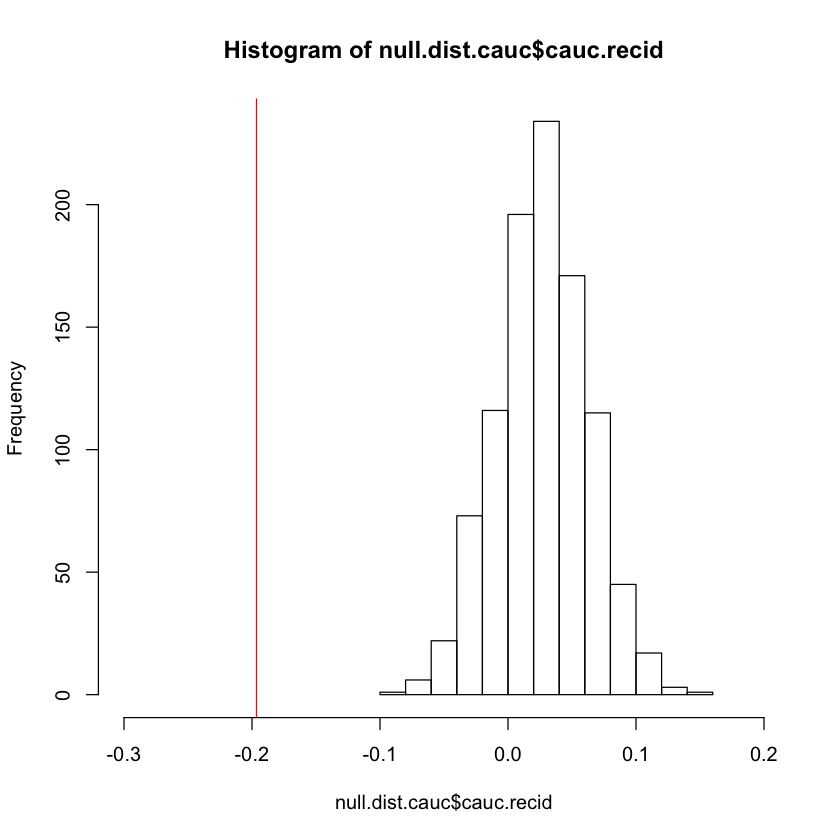

In [51]:
hist(null.dist.cauc$recid,xlim=c(-.3,.2))
abline(v=mean(cauc.recid),col="red")

### recalculating distance matrix: normalizing factors


In [75]:
head(colSums(df.temp))

sex         age_cat   juv_fel_count  juv_misd_count    priors_count 
           1395            7261             485             656           25050 
c_charge_degree 
           4666

note that values for priors_count tend to be larger than other factors

In [77]:
df.norm=t(t(df.temp)/colSums(df.temp))
df.dist.norm=as.matrix(dist(df.norm)) # calc euclidean distance between inmates
diag(df.dist.norm)=666
head(df.dist.norm)

1,2,3,4,5,6,7,8,9,10,...,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214
6.660000e+02,1.262067e-03,4.293831e-04,1.549590e-03,1.591912e-04,2.547525e-04,0.0006436763,1.825101e-04,0.0007607673,0.001285033,...,2.669707e-04,0.003321227,0.0004525521,0.0003845794,0.0002754442,0.0002754442,0.0002754442,0.0000000000,0.0007701360,0.0008240840
1.262067e-03,6.660000e+02,1.239076e-03,1.979438e-03,1.257068e-03,1.272705e-03,0.0013428303,1.260234e-03,0.0014607005,0.000143391,...,1.275207e-03,0.003065910,0.0012472942,0.0012396675,0.0012620673,0.0012620673,0.0012620673,0.0012620673,0.0014656017,0.0014247996
4.293831e-04,1.239076e-03,6.660000e+02,1.555992e-03,3.291569e-04,4.164123e-04,0.0004222905,3.218127e-04,0.0008290158,0.001226860,...,3.927795e-04,0.003291418,0.0002672628,0.0003006606,0.0003293939,0.0003293939,0.0003293939,0.0004293831,0.0008144709,0.0007212784
1.549590e-03,1.979438e-03,1.555992e-03,6.660000e+02,1.531119e-03,1.546046e-03,0.0016416629,1.532680e-03,0.0017041497,0.001974237,...,1.546046e-03,0.001992245,0.0015666184,0.0015726603,0.0015249129,0.0015249129,0.0015249129,0.0015495899,0.0017055518,0.0017094530
1.591912e-04,1.257068e-03,3.291569e-04,1.531119e-03,6.660000e+02,2.287050e-04,0.0005590023,3.992016e-05,0.0007524453,0.001262698,...,2.143163e-04,0.003308799,0.0003927795,0.0003678429,0.0001591912,0.0001591912,0.0001591912,0.0001591912,0.0007492617,0.0007847533
2.547525e-04,1.272705e-03,4.164123e-04,1.546046e-03,2.287050e-04,6.660000e+02,0.0006642916,2.455078e-04,0.0007168459,0.001280757,...,7.984032e-05,0.003305710,0.0003193271,0.0002881014,0.0002547525,0.0002547525,0.0002547525,0.0002547525,0.0007267810,0.0008174006


#### rerunning KNN with normalized factors

In [78]:
for(k in 20){ # 5:20 ?
    
    i=1
    current=data.frame(dist=df.dist.norm[,i])
    current$idx=seq(1:dim(current)[1])
    current=current %>% arrange(dist)
    neighbors=current$idx[1:k]

    current.race=df.num$race[i] # race of person being predicted
    actual.vscore=df.num$v_score[i] # violence score of person being predicted
    actual.rscore=df.num$r_score[i] # recidivism score of person being predicted
    predict.vscore=mean(df.num$v_score[neighbors]) # predicted violence score based on k neighbors
    predict.rscore=mean(df.num$r_score[neighbors]) # predicted recidivism score based on k neighbors
    vscore.err=actual.vscore-predict.vscore # difference between actual and predicted violence score
    rscore.err=actual.rscore-predict.rscore # difference between actual and predicted recidivism score
    results=data.frame(race=current.race,v.error=vscore.err,r.error=rscore.err) 

    for(i in 2:ncol(df.dist)){
    
        current=data.frame(dist=df.dist.norm[,i])
        current$idx=seq(1:dim(current)[1])
        current=current %>% arrange(dist)
        neighbors=current$idx[1:k]

        current.race=df.num$race[i] # race of person being predicted
        actual.vscore=df.num$v_score[i] # violence score of person being predicted
        actual.rscore=df.num$r_score[i] # recidivism score of person being predicted
        predict.vscore=mean(df.num$v_score[neighbors]) # predicted violence score based on k neighbors
        predict.rscore=mean(df.num$r_score[neighbors]) # predicted recidivism score based on k neighbors
        vscore.err=actual.vscore-predict.vscore # difference between actual and predicted violence score
        rscore.err=actual.rscore-predict.rscore # difference between actual and predicted recidivism score
        results.temp=data.frame(race=current.race,v.error=vscore.err,r.error=rscore.err) 
        results=rbind(results,results.temp)
    
    } # end i people

    write.csv(results,paste0("118b_knn.results.normdist_k",k,".csv"))

    cat("k = ",k,"\n")
    aa.violence=results$v.error[results$race=="African-American"]
    cauc.violence=results$v.error[results$race=="Caucasian"]
    cat("african american violence error: ",mean(aa.violence),"\n")
    cat("caucasian violence error: ",mean(cauc.violence),"\n")

    aa.recid=results$r.error[results$race=="African-American"]
    cauc.recid=results$r.error[results$race=="Caucasian"]
    cat("african american recid error: ",mean(aa.recid),"\n")
    cat("caucasian recid error: ",mean(cauc.recid))
    
    # calculate significance of the difference between actual vs. predicted score (i.e. permtation test)
    
    nresamples=1000

    results$race.shuff=sample(results$race,length(results$race),FALSE) # shuffle race ids
    null.dist.aa=data.frame(violence=mean(results$v.error[results$race.shuff=="African-American"]),recid=mean(results$r.error[results$race.shuff=="African-American"]))
    null.dist.cauc=data.frame(violence=mean(results$v.error[results$race.shuff=="Caucasian"]),recid=mean(results$r.error[results$race.shuff=="Caucasian"])) 
    
    for(p in 2:nresamples) {

        results$race.shuff=sample(results$race,length(results$race),FALSE)
        null.dist.aa.temp=data.frame(violence=mean(results$v.error[results$race.shuff=="African-American"]),recid=mean(results$r.error[results$race.shuff=="African-American"]))
        null.dist.cauc.temp=data.frame(violence=mean(results$v.error[results$race.shuff=="Caucasian"]),recid=mean(results$r.error[results$race.shuff=="Caucasian"])) 
    
        null.dist.aa=rbind(null.dist.aa,null.dist.aa.temp)
        null.dist.cauc=rbind(null.dist.cauc,null.dist.cauc.temp)

    } # end p resamples

    write.csv(null.dist.aa,paste0("118b_knn.permutation.normdist.aa_k",k,".csv"))
    write.csv(null.dist.cauc,paste0("118b_knn.permutation.normdist.cauc_k",k,".csv"))
    
} # // end k neighbors


k =  20 
african american violence error:  0.2627435 
caucasian violence error:  -0.2092706 
african american recid error:  0.3253111 
caucasian recid error:  -0.1990016

### now let's try using a gaussian kernel for similarity measure

1,2,3,4,5,6,7,8,9,10,...,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214
1.00000000,0.20335262,0.83162820,0.09060656,0.97497656,0.93716224,0.66079003,0.96723872,0.56058922,0.19179858,...,0.93120732,1.619917e-05,0.81480750,0.86251626,0.92693718,0.92693718,0.92693718,1.00000000,0.55260631,0.50706585
0.20335262,1.00000000,0.21538907,0.01987738,0.20592961,0.19794266,0.16477188,0.20429526,0.11840481,0.97964895,...,0.19668489,8.274046e-05,0.21103256,0.21507350,0.20335262,0.20335262,0.20335262,0.20335262,0.11671870,0.13132845
0.83162820,0.21538907,1.00000000,0.08882291,0.89731862,0.84080191,0.83666688,0.90161885,0.50294865,0.22197588,...,0.85703565,1.972879e-05,0.93106201,0.91356864,0.89717860,0.89717860,0.89717860,0.83162820,0.51511613,0.59437640
0.09060656,0.01987738,0.08882291,1.00000000,0.09591177,0.09160604,0.06753853,0.09545432,0.05479666,0.02029031,...,0.09160604,1.889153e-02,0.08592391,0.08430952,0.09774832,0.09774832,0.09774832,0.09060656,0.05453531,0.05381357
0.97497656,0.20592961,0.89731862,0.09591177,1.00000000,0.94903845,0.73162764,0.99840765,0.56769330,0.20302881,...,0.95510739,1.759052e-05,0.85703565,0.87344651,0.97497656,0.97497656,0.97497656,0.97497656,0.57041385,0.54018813
0.93716224,0.19794266,0.84080191,0.09160604,0.94903845,1.00000000,0.64321048,0.94150647,0.59817734,0.19391432,...,0.99364580,1.795366e-05,0.90305683,0.92034892,0.93716224,0.93716224,0.93716224,0.93716224,0.58965917,0.51265931


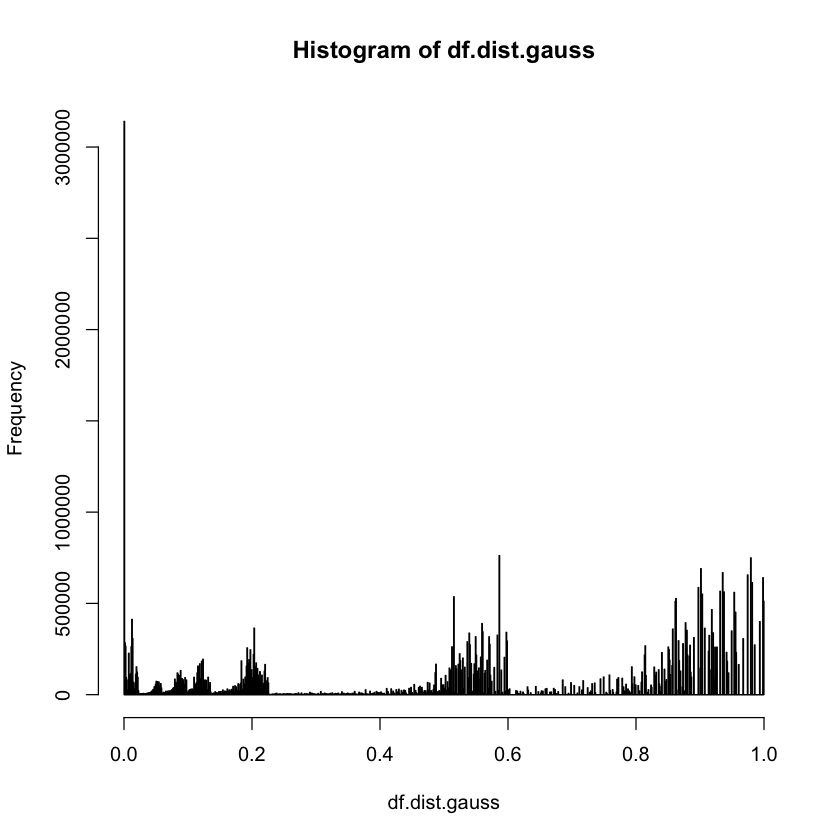

In [85]:
library(KRLS)
df.dist.gauss=as.matrix(gausskernel(df.norm,sigma=.000001)) # calc euclidean distance between inmates
head(df.dist.gauss)
diag(df.dist.gauss)=0
hist(df.dist.gauss,breaks=1000)


#### running KNN again with gaussian similarity matrix

In [86]:
for(k in 20){ # 5:20 ?
    
    i=1
    current=data.frame(dist=df.dist.gauss[,i])
    current$idx=seq(1:dim(current)[1])
    current=current %>% arrange(-dist) # largest to smallest values
    neighbors=current$idx[1:k]

    current.race=df.num$race[i] # race of person being predicted
    actual.vscore=df.num$v_score[i] # violence score of person being predicted
    actual.rscore=df.num$r_score[i] # recidivism score of person being predicted
    predict.vscore=mean(df.num$v_score[neighbors]) # predicted violence score based on k neighbors
    predict.rscore=mean(df.num$r_score[neighbors]) # predicted recidivism score based on k neighbors
    vscore.err=actual.vscore-predict.vscore # difference between actual and predicted violence score
    rscore.err=actual.rscore-predict.rscore # difference between actual and predicted recidivism score
    results=data.frame(race=current.race,v.error=vscore.err,r.error=rscore.err) 

    for(i in 2:ncol(df.dist)){
    
        current=data.frame(dist=df.dist.gauss[,i])
        current$idx=seq(1:dim(current)[1])
        current=current %>% arrange(-dist)
        neighbors=current$idx[1:k]

        current.race=df.num$race[i] # race of person being predicted
        actual.vscore=df.num$v_score[i] # violence score of person being predicted
        actual.rscore=df.num$r_score[i] # recidivism score of person being predicted
        predict.vscore=mean(df.num$v_score[neighbors]) # predicted violence score based on k neighbors
        predict.rscore=mean(df.num$r_score[neighbors]) # predicted recidivism score based on k neighbors
        vscore.err=actual.vscore-predict.vscore # difference between actual and predicted violence score
        rscore.err=actual.rscore-predict.rscore # difference between actual and predicted recidivism score
        results.temp=data.frame(race=current.race,v.error=vscore.err,r.error=rscore.err) 
        results=rbind(results,results.temp)
    
    } # end i people

    write.csv(results,paste0("118b_knn.results.gaussdist_k",k,".csv"))

    cat("k =",k,"\n")
    aa.violence=results$v.error[results$race=="African-American"]
    cauc.violence=results$v.error[results$race=="Caucasian"]
    cat("african american violence error: ",mean(aa.violence),"\n")
    cat("caucasian violence error: ",mean(cauc.violence),"\n")

    aa.recid=results$r.error[results$race=="African-American"]
    cauc.recid=results$r.error[results$race=="Caucasian"]
    cat("african american recid error: ",mean(aa.recid),"\n")
    cat("caucasian recid error: ",mean(cauc.recid))
    
    # calculate significance of the difference between actual vs. predicted score (i.e. permtation test)
    
    nresamples=1000

    results$race.shuff=sample(results$race,length(results$race),FALSE) # shuffle race ids
    null.dist.aa=data.frame(violence=mean(results$v.error[results$race.shuff=="African-American"]),recid=mean(results$r.error[results$race.shuff=="African-American"]))
    null.dist.cauc=data.frame(violence=mean(results$v.error[results$race.shuff=="Caucasian"]),recid=mean(results$r.error[results$race.shuff=="Caucasian"])) 
    
    for(p in 2:nresamples) {

        results$race.shuff=sample(results$race,length(results$race),FALSE)
        null.dist.aa.temp=data.frame(violence=mean(results$v.error[results$race.shuff=="African-American"]),recid=mean(results$r.error[results$race.shuff=="African-American"]))
        null.dist.cauc.temp=data.frame(violence=mean(results$v.error[results$race.shuff=="Caucasian"]),recid=mean(results$r.error[results$race.shuff=="Caucasian"])) 
    
        null.dist.aa=rbind(null.dist.aa,null.dist.aa.temp)
        null.dist.cauc=rbind(null.dist.cauc,null.dist.cauc.temp)

    } # end p resamples

    write.csv(null.dist.aa,paste0("118b_knn.permutation.gaussdist.aa_k",k,".csv"))
    write.csv(null.dist.cauc,paste0("118b_knn.permutation.gaussdist.cauc_k",k,".csv"))
    
} # // end k neighbors


k =  20 
african american violence error:  0.2623512 
caucasian violence error:  -0.2103504 
african american recid error:  0.3275162 
caucasian recid error:  -0.1970049

### conclusion: results are very similar regardless of similarity/distance measure